[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


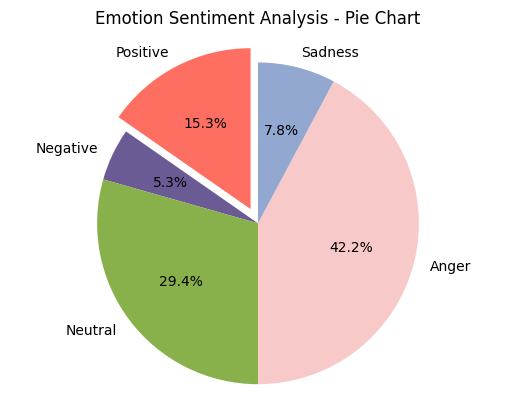

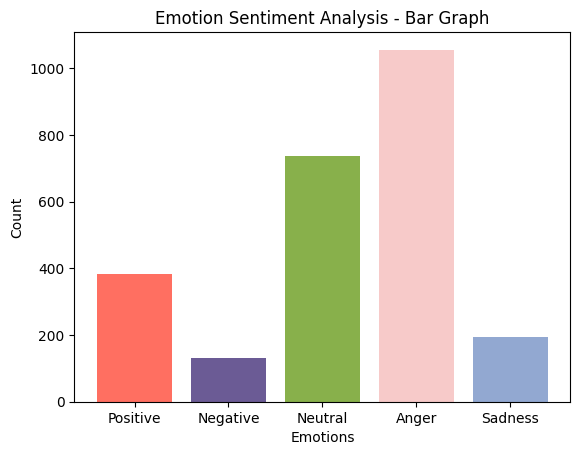

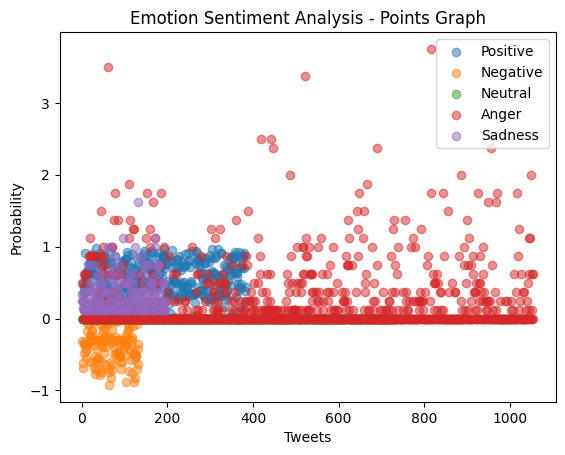

Emotion Counts:
Positive: 383
Negative: 132
Neutral: 735
Anger: 1055
Sadness: 195
Total Count: 1250


In [1]:
import csv
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import sentiwordnet as swn
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import sys

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('vader_lexicon')

def get_emotion(emotion_scores):
    max_score = max(emotion_scores.values())
    for emotion, score in emotion_scores.items():
        if score == max_score:
            return emotion

def analyze_sentiments(csv_file):
    # Read the CSV file
    tweets = []
    with open(csv_file, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip the header row
        for row in csv_reader:
            tweets.append(row[0])

    # Create sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Perform sentiment analysis and emotion detection
    emotion_counts = {'Positive': 0, 'Negative': 0, 'Neutral': 0, 'Anger': 0, 'Sadness': 0}
    total_count = len(tweets)
    emotion_probabilities = {'Positive': [], 'Negative': [], 'Neutral': [], 'Anger': [], 'Sadness': []}
    for tweet in tweets:
        sentiment_scores = analyzer.polarity_scores(tweet)
        compound_score = sentiment_scores['compound']
        if compound_score > 0:
            emotion_counts['Positive'] += 1
            emotion_probabilities['Positive'].append(compound_score)
        elif compound_score < 0:
            emotion_counts['Negative'] += 1
            emotion_probabilities['Negative'].append(compound_score)
        else:
            emotion_counts['Neutral'] += 1
            emotion_probabilities['Neutral'].append(compound_score)

        emotion_scores = {'Anger': 0, 'Sadness': 0}
        tokenized_words = word_tokenize(tweet)
        for word in tokenized_words:
            word = word.lower()
            if word in stopwords.words('english'):
                continue

            synsets = list(swn.senti_synsets(word))
            if synsets:
                synset = synsets[0]
                emotion_scores['Anger'] += synset.pos_score() - synset.neg_score()
                emotion_scores['Sadness'] += synset.neg_score() - synset.pos_score()

        dominant_emotion = get_emotion(emotion_scores)
        emotion_counts[dominant_emotion] += 1
        emotion_probabilities[dominant_emotion].append(emotion_scores[dominant_emotion])

    # Generate pie chart
    # labels = emotion_counts.keys()
    # sizes = emotion_counts.values()
    # colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']

    # explode = (0.1, 0, 0, 0, 0)
    # plt.figure(1)
    # plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    # plt.axis('equal')
    # plt.title('Emotion Sentiment Analysis - Pie Chart')

    # Generate bar graph
    # plt.figure(2)
    # plt.bar(labels, sizes, color=colors)
    # plt.title('Emotion Sentiment Analysis - Bar Graph')
    # plt.xlabel('Emotions')
    # plt.ylabel('Count')

    # Generate points graph
    # plt.figure(3)
    # for emotion, probabilities in emotion_probabilities.items():
    #     x = list(range(1, len(probabilities) + 1))
    #     plt.scatter(x, probabilities, label=emotion, alpha=0.5)
    # plt.title('Emotion Sentiment Analysis - Points Graph')
    # plt.xlabel('Tweets')
    # plt.ylabel('Probability')
    # plt.legend()

    # plt.show()

    # Display emotion counts
    print('Emotion Counts:')
    for emotion, count in emotion_counts.items():
        print(f'{emotion}: {count}')

    # Display total count
    print(f'Total Count: {total_count}')

if __name__ == '__main__':
    if len(sys.argv) != 2:
        print("Usage: python python_script.py <path_to_csv_file>")
        sys.exit(1)

    csv_file_path = sys.argv[1]
    analyze_sentiments(csv_file_path)
